## LR with sample imbalance problem

The **banking** dataset comes from the [UCI Machine Learning repository](http://archive.ics.uci.edu/ml/index.php). The dataset is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. 

The goal of this project is to deal with sample imbalance and construct the classifier to predict whether the client will subscribe (1= yes; 0= no) to a term deposit. 

### Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Read and prepare the data

In [2]:
# read the data
data = pd.read_csv("banking.csv", header=0)
print(data.shape)
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
# for the Education variable, find its unique values
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [4]:
# for the outcome variable, calculate value counts
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [5]:
# calculate the proportion of 1s
4640/(4640+36548)

0.11265417111780131

Text(0, 0.5, 'Frequency of Subscription')

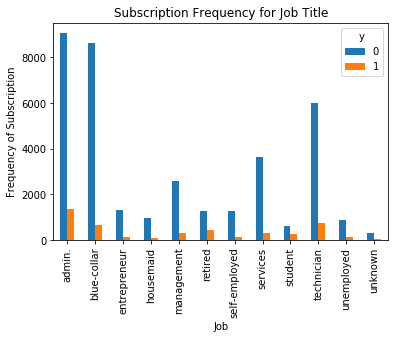

In [6]:
# construct a frequency plot
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Subscription Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Subscription')


In [7]:
# create dummy variables for categorical variables
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1

data_vars = data.columns.values.tolist()

to_keep = [i for i in data_vars if i not in cat_vars]
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [8]:
# separate the outcome variable and the features
X = data_final.drop("y", axis=1)
y = data_final["y"]

In [9]:
# split the sample into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Make a function for LR estimation

In [10]:
# my LR function

def myLR(X_tr, y_tr, cutoff=0.5):
    
    LRmodel = LR(random_state=0, solver='lbfgs').fit(X_tr, y_tr)
    y_test_pred_probs = LRmodel.predict_proba(X_test)
    y_test_pred_classes = np.array([(y_test_pred_probs[i][1]>cutoff).astype(int) for i in range(len(X_test))])
    print(classification_report(y_true=y_test, y_pred = y_test_pred_classes))
    

## Over-sampling using SMOTE

In [11]:
# run the SMOTE procedure
os = SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_sample(X_train, y_train)

# transform the up-sampled data
os_X_train = pd.DataFrame(data=os_data_X, columns=X_train.columns)
os_y_train = pd.DataFrame(data=os_data_y, columns=['y'])

In [12]:
# check the dimensions of our data
print("Length of the oversampled data                    =", len(os_data_X))
print("Number of no subscription in the oversampled data =", len(os_y_train[os_y_train['y']==0]))
print("Number of subscription in the oversampled data    =", len(os_y_train[os_y_train['y']==1]))

Length of the oversampled data                    = 58446
Number of no subscription in the oversampled data = 29223
Number of subscription in the oversampled data    = 29223


In [13]:
myLR(os_X_train, os_y_train, cutoff=0.5)

C:\Users\danil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7325
           1       0.42      0.86      0.56       913

    accuracy                           0.85      8238
   macro avg       0.70      0.86      0.74      8238
weighted avg       0.92      0.85      0.87      8238



C:\Users\danil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [14]:
myLR(X_train, y_train,cutoff=0.11)

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7325
           1       0.39      0.84      0.54       913

    accuracy                           0.84      8238
   macro avg       0.69      0.84      0.72      8238
weighted avg       0.91      0.84      0.86      8238



C:\Users\danil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
